# Best Predictor to Determine Song Popularity

The goal of this project will be to determine what features of a song is the best predictor for it's popularity. I want to determine if there is an aspect of a song that determines if it is popular or not. This project is going to use multiple supervised learning machine learning methods to determine if a song is popular or not. Then I will use KNN and Decision Tree to determine if I can utilize to genre to predict if a song is popular or not. This notebook will be in multiple parts. The data analysis completed on this project will be as follows.

1) Data cleaning removing any duplicates
2) Dropping unneccesary data
3) Create a correlation matrix for the data
4) Create a pairplot of the data
5) Splitting data into test and train
5) Run linear regression models on each feature and report R-squared values
6) Determine the best predictor for song popularity based on linear regression models
7) Run a multilinear models to also determine best predictor for song popularity 
8) Run a random forest model to determine best predictor fo song popularity
9) Examine the binary classification problem if a song is popular or not by running a KNN and Decision Trees
10) Create a confusion matrix for KNN model and Decision Tree

github link: https://github.com/rwashi690/ML_MusicPopularity.git

The dataset used was gathered from Spotify and made publically available on Kaggle, it includes approximately 89741 songs

dataset :https://www.kaggle.com/datasets/anupsubbu/spotify-song-popularity-prediction?rvi=1

### Results and Discussion

The goal of this project was to determine what feature has the biggest impact on song popularity. The intial plan was to utilize linear regression and determine what feature was the best predictor fo song popularity.

By fitting each feature it was discovered there was no linear relationship between song popularity and features. Instrumentalness had the greatest correlation between song popularity for linear regression. However, this model had very poor fit. I initially assummed that song popularity and features were linearly related.

However, when fit to a Random Forest Model that had a much higher R-squared value genre was the greatest predictor to determine song popularity. In the future I would like to try additional models, and expand the dataset to more songs to determine if I can have another model better predict song popularity.

Lastly, a threshold of 50 was utilized to determine if a song was popular or not and KNN and Decision Trees were used to evaluate how successful predicting song popularity would be. KNN and Decision Tree could mostly identify true positives (a song is actually popular) and was less able to indentify true negatives (a song really is not popular). Further, the results between KNN and Decision Tree was the same indicating one model was not better than the other at predicting if a song was popular or not

In [95]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Data cleaning

In [2]:
#Data Cleaning and removing song duplicates
df = pd.read_csv('spotify__song_popularity_prediction.csv')
#My dataframe has some duplicate entries so I will be removing them here
dfCleaned=df.drop_duplicates(subset='track_id', keep='first')

In [3]:
#Showing a summary of the cleaned dataframe
dfCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89741 non-null  int64  
 1   track_id          89741 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89741 non-null  int64  
 6   duration_ms       89741 non-null  int64  
 7   explicit          89741 non-null  bool   
 8   danceability      89741 non-null  float64
 9   energy            89741 non-null  float64
 10  key               89741 non-null  int64  
 11  loudness          89741 non-null  float64
 12  mode              89741 non-null  int64  
 13  speechiness       89741 non-null  float64
 14  acousticness      89741 non-null  float64
 15  instrumentalness  89741 non-null  float64
 16  liveness          89741 non-null  float64
 1

In [62]:
#So I have a total of 89,741 unique songs in my dataframe
dfCleaned.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   89741.000000  89741.000000  8.974100e+04  89741.000000  89741.000000   
mean    53479.144148     33.198438  2.291418e+05      0.562166      0.634458   
std     33409.981502     20.580824  1.129477e+05      0.176691      0.256605   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     23767.000000     19.000000  1.730400e+05      0.450000      0.457000   
50%     50681.000000     33.000000  2.132930e+05      0.576000      0.676000   
75%     80618.000000     49.000000  2.642930e+05      0.692000      0.853000   
max    113999.000000    100.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       5.283549     -8.499004      0.636966      0.087442      0.328289   
std        3.559897      5.221490      0.480877      0.113277      0.338321   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.322000      0.000000      0.036000      0.017100   
50%        5.000000     -7.185000      1.000000      0.048900      0.188000   
75%        8.000000     -5.108000      1.000000      0.085900      0.625000   
max       11.000000      4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      89741.000000  89741.000000  89741.000000  89741.000000   
mean           0.173413      0.216970      0.469477    122.058316   
std            0.323848      0.194884      0.262864     30.117532   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.264000   
50%            0.000058      0.132000      0.457000    122.013000   
75%            0.097600      0.279000      0.682000    140.077000   
max            1.000000      1.000000      0.995000    243.372000   

       time_signature  
count    89741.000000  
mean         3.897427  
std          0.453435  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [63]:
dfCleaned.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

Further cleaning the data by dropping unneccesary columns to perform multilinear and linear regression

Unnamed: 0 column was dropped because it was an column without useful data and just entry number in the dataframe

Explicit is a boolean not able to determine influence on popularity through multilinear and linear regression

track_id is not relevant to song popularity so it was dropped

track_name, artist name, and album name were dropped because we are not able to use supervised ML to determine if it had impact on song popularity Further, this data is also just a snapshot of Spotify song popularity so there is not enough data to determine if things like artist name would influence song popularity

In [5]:
Reg_DF = dfCleaned.drop (['Unnamed: 0','explicit','track_id', 'track_name', 'artists', 'album_name'], axis=1)
Reg_DF.reset_index(drop=True, inplace=True)
#Since I want to keep track genre and it is a string I am going to factorize it
Reg_DF['genre'], _ = pd.factorize(Reg_DF['track_genre'])
Reg_DF.drop('track_genre', axis=1, inplace=True)
#Some of the acousticness data is in scientific notation so convert those to numeric
Reg_DF['acousticness'] = pd.to_numeric(Reg_DF['acousticness'])

# #Standardized the data for better outcomes with linear regression
Xs= Reg_DF.drop('popularity', axis=1)
ys = Reg_DF['popularity']
scaler = StandardScaler()
Xscaled = scaler.fit_transform(Xs)
XscaledDF = pd.DataFrame(Xscaled, columns = Xs.columns)
XscaledDF['popularity'] = ys
Reg_DF=XscaledDF


#Dropping all columns except genre and popularity for KNN and Decision Tree
IntDF=dfCleaned.drop (['Unnamed: 0','explicit','track_id', 'track_name', 'artists', 'album_name'], axis=1)
#Determine if a song is popular based on a score of 50 or more
IntDF['popular'] = np.where(IntDF['popularity'] >= 50, 1,0)
IntDF['genre'], _ = pd.factorize(IntDF['track_genre'])

KNN_DT_DF = IntDF[['popular','genre']]

In [48]:
#An overview of the data I am using for most analysis
Reg_DF.describe()

duration_ms  danceability        energy           key      loudness  \
count  8.974100e+04  8.974100e+04  8.974100e+04  8.974100e+04  8.974100e+04   
mean   3.293765e-17 -7.854363e-17  1.520199e-17 -1.551870e-17 -1.209825e-16   
std    1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00   
min   -2.028753e+00 -3.181647e+00 -2.472522e+00 -1.484194e+00 -7.858337e+00   
25%   -4.967087e-01 -6.348156e-01 -6.915644e-01 -9.223772e-01 -3.491352e-01   
50%   -1.403207e-01  7.829709e-02  1.618921e-01 -7.965144e-02  2.516546e-01   
75%    3.112181e-01  7.348135e-01  8.516721e-01  7.630744e-01  6.494360e-01   
max    4.434069e+01  2.393083e+00  1.424540e+00  1.605800e+00  2.495663e+00   

               mode   speechiness  acousticness  instrumentalness  \
count  8.974100e+04  8.974100e+04  8.974100e+04      8.974100e+04   
mean  -6.587530e-17  1.659551e-16 -1.165486e-16     -2.026932e-17   
std    1.000006e+00  1.000006e+00  1.000006e+00      1.000006e+00   
min   -1.324600e+00 -7.719348e-01 -9.703536e-01     -5.354810e-01   
25%   -1.324600e+00 -4.541282e-01 -9.198096e-01     -5.354810e-01   
50%    7.549447e-01 -3.402475e-01 -4.146649e-01     -5.353019e-01   
75%    7.549447e-01 -1.361301e-02  8.770156e-01     -2.341034e-01   
max    7.549447e-01  7.747047e+00  1.973614e+00      2.552405e+00   

           liveness       valence         tempo  time_signature         genre  \
count  8.974100e+04  8.974100e+04  8.974100e+04    8.974100e+04  8.974100e+04   
mean   9.627929e-17 -1.684888e-16 -2.470324e-16    4.535261e-16  8.107730e-17   
std    1.000006e+00  1.000006e+00  1.000006e+00    1.000006e+00  1.000006e+00   
min   -1.113331e+00 -1.786022e+00 -4.052756e+00   -8.595391e+00 -1.590354e+00   
25%   -6.094392e-01 -8.387569e-01 -7.568496e-01    2.262146e-01 -8.983554e-01   
50%   -4.360021e-01 -4.746742e-02 -1.504655e-03    2.262146e-01 -8.600951e-02   
75%    3.182955e-01  8.084947e-01  5.982822e-01    2.262146e-01  8.165970e-01   
max    4.017946e+00  1.999233e+00  4.028031e+00    2.431616e+00  1.779377e+00   

         popularity  
count  89741.000000  
mean      33.198438  
std       20.580824  
min        0.000000  
25%       19.000000  
50%       33.000000  
75%       49.000000  
max      100.000000

In [6]:
KNN_DT_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89741 entries, 0 to 113999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   popular  89741 non-null  int64
 1   genre    89741 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB


In [7]:
Reg_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       89741 non-null  float64
 1   danceability      89741 non-null  float64
 2   energy            89741 non-null  float64
 3   key               89741 non-null  float64
 4   loudness          89741 non-null  float64
 5   mode              89741 non-null  float64
 6   speechiness       89741 non-null  float64
 7   acousticness      89741 non-null  float64
 8   instrumentalness  89741 non-null  float64
 9   liveness          89741 non-null  float64
 10  valence           89741 non-null  float64
 11  tempo             89741 non-null  float64
 12  time_signature    89741 non-null  float64
 13  genre             89741 non-null  float64
 14  popularity        89741 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 10.3 MB


## EDA

EDA was performed to determine relationships and better visualize the data set.

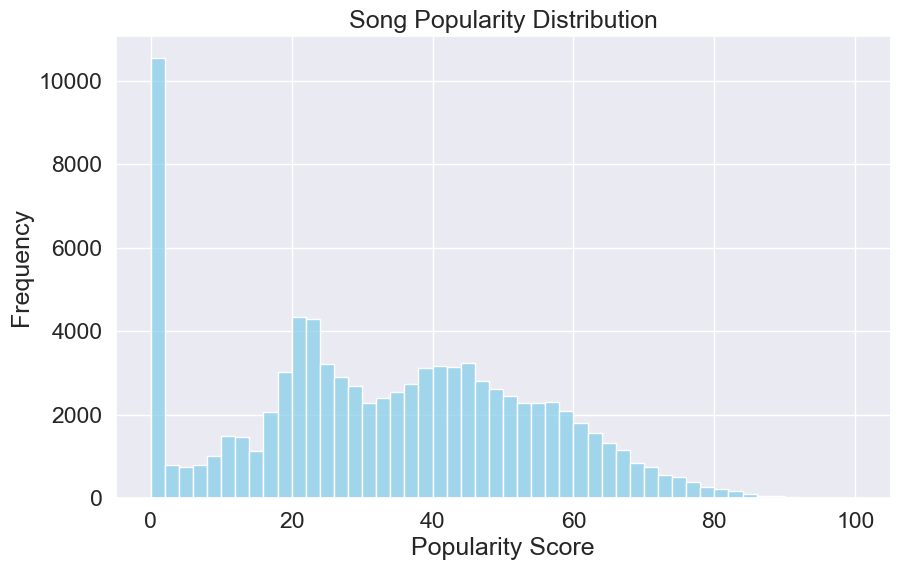

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(Reg_DF['popularity'], bins=50, kde=False, color='skyblue')
plt.title('Song Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

Showcases, most songs do not get a high popularity score, most songs have no popularity in the dataset

In [8]:
#Creating correlation matrix
Reg_DF.corr()

duration_ms  danceability    energy       key  loudness  \
duration_ms          1.000000     -0.064130  0.063261  0.011286  0.000364   
danceability        -0.064130      1.000000  0.143914  0.035114  0.271839   
energy               0.063261      0.143914  1.000000  0.046334  0.758774   
key                  0.011286      0.035114  0.046334  1.000000  0.035902   
loudness             0.000364      0.271839  0.758774  0.035902  1.000000   
mode                -0.039347     -0.062633 -0.075014 -0.142096 -0.037108   
speechiness         -0.060744      0.109520  0.141332  0.017759  0.055295   
acousticness        -0.108499     -0.177043 -0.732566 -0.045159 -0.582663   
instrumentalness     0.117381     -0.194747 -0.181037 -0.005284 -0.434717   
liveness             0.008126     -0.132234  0.188941 -0.002584  0.077239   
valence             -0.147037      0.492571  0.256313  0.026258  0.289091   
tempo                0.025991     -0.021331  0.258628  0.008275  0.228659   
time_signature       0.022602      0.210041  0.186534  0.014801  0.193695   
genre               -0.029347     -0.026635 -0.061787 -0.009155 -0.043471   
popularity          -0.023119      0.064281  0.013728  0.003432  0.071676   

                      mode  speechiness  acousticness  instrumentalness  \
duration_ms      -0.039347    -0.060744     -0.108499          0.117381   
danceability     -0.062633     0.109520     -0.177043         -0.194747   
energy           -0.075014     0.141332     -0.732566         -0.181037   
key              -0.142096     0.017759     -0.045159         -0.005284   
loudness         -0.037108     0.055295     -0.582663         -0.434717   
mode              1.000000    -0.040798      0.091020         -0.052580   
speechiness      -0.040798     1.000000      0.005121         -0.099658   
acousticness      0.091020     0.005121      1.000000          0.096065   
instrumentalness -0.052580    -0.099658      0.096065          1.000000   
liveness          0.016777     0.225102     -0.019081         -0.087152   
valence           0.025568     0.032932     -0.103767         -0.330759   
tempo            -0.001903     0.004032     -0.220244         -0.056888   
time_signature   -0.023903    -0.006198     -0.174054         -0.082237   
genre            -0.005809    -0.087138      0.087524         -0.049612   
popularity       -0.016214    -0.047081     -0.038847         -0.127465   

                  liveness   valence     tempo  time_signature     genre  \
duration_ms       0.008126 -0.147037  0.025991        0.022602 -0.029347   
danceability     -0.132234  0.492571 -0.021331        0.210041 -0.026635   
energy            0.188941  0.256313  0.258628        0.186534 -0.061787   
key              -0.002584  0.026258  0.008275        0.014801 -0.009155   
loudness          0.077239  0.289091  0.228659        0.193695 -0.043471   
mode              0.016777  0.025568 -0.001903       -0.023903 -0.005809   
speechiness       0.225102  0.032932  0.004032       -0.006198 -0.087138   
acousticness     -0.019081 -0.103767 -0.220244       -0.174054  0.087524   
instrumentalness -0.087152 -0.330759 -0.056888       -0.082237 -0.049612   
liveness          1.000000  0.012314 -0.006117       -0.030787  0.048673   
valence           0.012314  1.000000  0.090622        0.135525  0.035306   
tempo            -0.006117  0.090622  1.000000        0.085456 -0.032281   
time_signature   -0.030787  0.135525  0.085456        1.000000 -0.030440   
genre             0.048673  0.035306 -0.032281       -0.030440  1.000000   
popularity       -0.013844 -0.011526  0.007270        0.036893  0.036906   

                  popularity  
duration_ms        -0.023119  
danceability        0.064281  
energy              0.013728  
key                 0.003432  
loudness            0.071676  
mode               -0.016214  
speechiness        -0.047081  
acousticness       -0.038847  
instrumentalness   -0.127465  
liveness           -0.013844  
valence            -0.0115

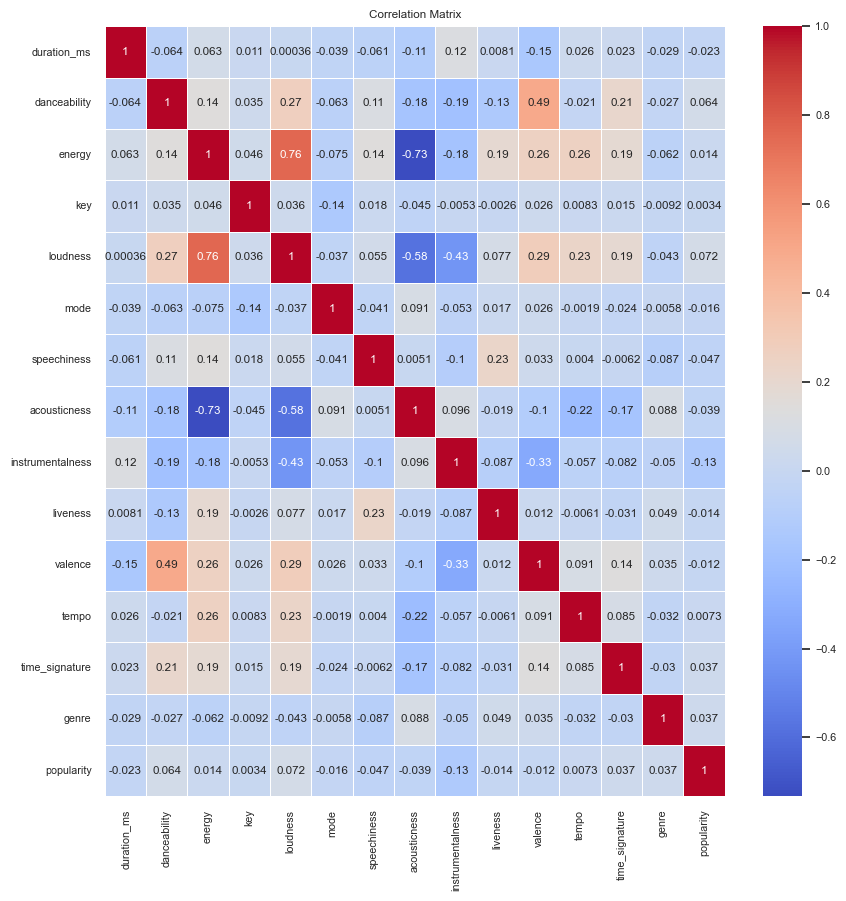

In [9]:
#Plotting correlation matrix
sns.set(font_scale=.7)
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(Reg_DF.corr(), annot=True, linewidth=.5, cmap='coolwarm')
plt.show()

Based on correlation matrix loudness is the predictor with the strongest relationship with song popularity. However, it seems there is no feature that is strongly correlated with song popularity. We may have difficulty determining if there is a definitive best predictor for song popularity.

To determine if this is the case, I am going to run linear regression models, multilinear regression models and then Random Forest to see if I can determine if there is a good predictor for song popularity.

Interestingly, it seems loudness and energy have are strongly correlated. So I can run a linear regression to confirm if this is the case.

/Users/r/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

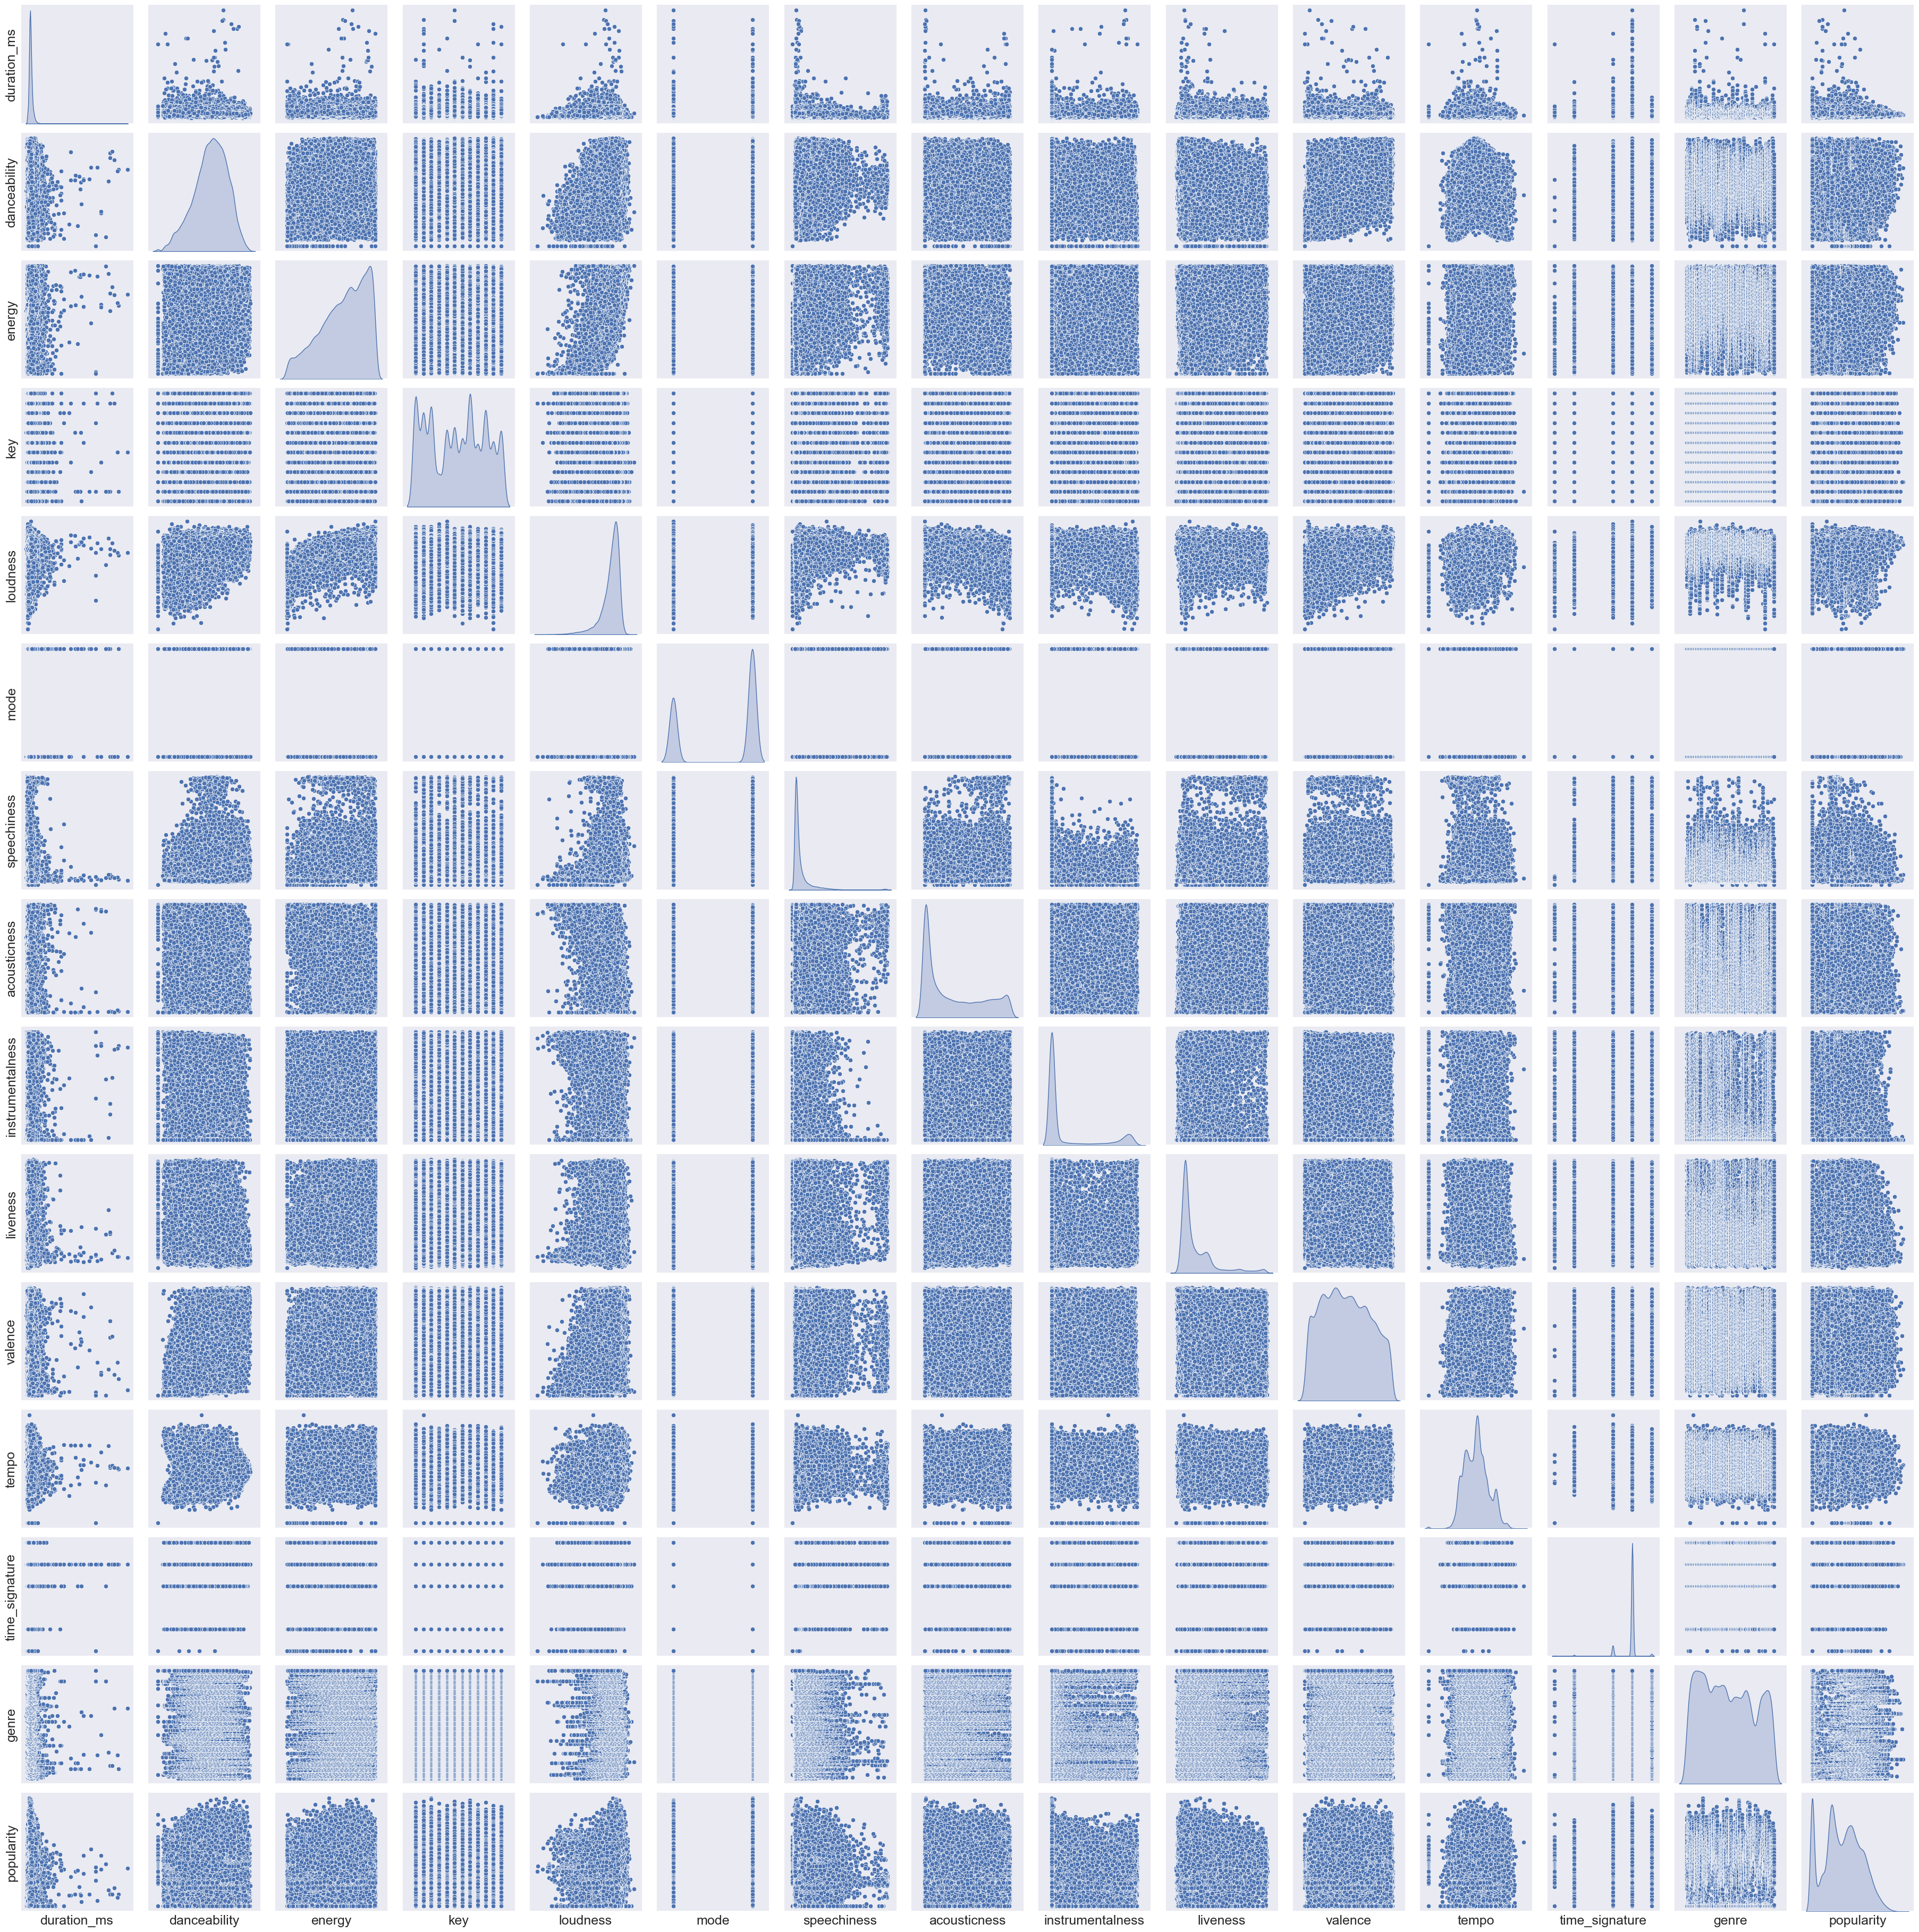

In [44]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
#Graphing a pairplot to visualize correlations

pairPlot=sns.pairplot(Reg_DF, diag_kind="kde")
axes=pairPlot.axes.flatten()
for axis in axes:
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()



## Linear Regression Models

In [11]:
#Splitting data into testing and training for simple linear regression 

X = Reg_DF.drop('popularity', axis=1)
y = Reg_DF['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

train, test = train_test_split(Reg_DF, test_size = 0.20, random_state=42)



In [12]:
# #Going to run models on each feature to determine best predictor

adjustedRValues={}

#iterate through the predictors
for predictor in train.columns:
    formula = f'popularity ~ {predictor}'
    model = smf.ols(formula=formula, data=train).fit()
    adjustedRValues[predictor] = model.rsquared_adj

sortedPredictors = sorted(adjustedRValues.items(), key=lambda x: x[1], reverse=True)
sortedPredictors   


[('popularity', 1.0),
 ('instrumentalness', 0.01618488345653324),
 ('loudness', 0.004927540518448015),
 ('danceability', 0.0041058105707755255),
 ('speechiness', 0.002257122479505269),
 ('acousticness', 0.0016548159091670511),
 ('genre', 0.001402051090931944),
 ('time_signature', 0.0013403967307985543),
 ('duration_ms', 0.0004743628996903837),
 ('mode', 0.000295395663496012),
 ('liveness', 0.00020951577837313717),
 ('valence', 0.00019525840199907663),
 ('energy', 0.00016670132697282902),
 ('tempo', 3.7473511833585604e-05),
 ('key', -5.184757076781565e-06)]

Based on our data, instrumentalness was the greatest predictor if a song was to be popular or not. However, model suggests there is little linear relationship between any of the features and song popularity

Going to determine how well the model of instrumentalness vs song popularity

In [76]:
# #Now going to determine how well this model performs

#Split data into just instrumentalness
Xtrain_instrumentalness = sm.add_constant(X_train[['instrumentalness']])
Xtest_instrumentalness = sm.add_constant(X_test[['instrumentalness']])

instrumentalnessModel = sm.OLS(y_train, Xtrain_instrumentalness).fit()
y_pred = instrumentalnessModel.predict(Xtest_instrumentalness)

meanAbsErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(meanSqErr)
rSq = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {meanAbsErr}")
print(f"Mean Squared Error: {meanSqErr}")
print(f"Root Mean Square Error: {RMSE}")
print(f"R-Squared: {rSq}")

Mean Absolute Error: 16.893541569418108
Mean Squared Error: 410.8553515474513
Root Mean Square Error: 20.269567127776835
R-Squared: 0.016364544559818173


### Performing Regularization by L1 Regularization (Lasso)


In [73]:
#Perform a novel technique in regularizing the data
lasso = LassoCV(cv=5, random_state=0, max_iter=10000)
lasso.fit(X_train, y_train)
y_predLasso = lasso.predict(X_test)

In [74]:
#List coefficients to determine best predictor in song popularity
coefficients = pd.Series(lasso.coef_, index=X_train.columns)
sortedCoefficients = coefficients.sort_values(ascending=False)
print(sortedCoefficients)

danceability        1.742690
genre               0.663944
loudness            0.385497
time_signature      0.366354
tempo               0.141231
liveness            0.028395
key                 0.000000
mode               -0.372916
duration_ms        -0.450604
energy             -0.551195
acousticness       -0.616584
speechiness        -1.301813
valence            -2.227623
instrumentalness   -2.896224
dtype: float64


In [75]:
#Calculate MAE, MSE, RMSE, and Rsquared
meanAbsErrLasso = mean_absolute_error(y_test, y_predLasso)
meanSqErrLasso = mean_squared_error(y_test, y_predLasso)
RMSELasso = np.sqrt(meanSqErr)
rSqLasso = r2_score(y_test,y_predLasso)

print(f"Mean Absolute Error: {meanAbsErrLasso}")
print(f"Mean Squared Error: {meanSqErrLasso}")
print(f"Root Mean Square Error: {RMSELasso}")
print(f"R-Squared: {rSqLasso}")


Mean Absolute Error: 16.573746916331995
Mean Squared Error: 405.1864792911557
Root Mean Square Error: 20.131095792087056
R-Squared: 0.02993648349806388


From L1 Regularization (Lasso) the fit was slightly better but still very poor. The feature with the highest correlation was danceability followed by genre. 

##### Examining the relationship between loudness and energy

In [14]:
#Examining the relationship between loudness and energy
formula_le = f'energy ~ loudness'
model_le = smf.ols(formula=formula_le, data=train).fit()
model_le.rsquared_adj

model_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 9.777e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:16   Log-Likelihood:                -71028.
No. Observations:               71792   AIC:                         1.421e+05
Df Residuals:                   71790   BIC:                         1.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.002      0.568      0.570      -0.003       0.006
loudness       0.7568      0.002    312.680      0.000       0.752       0.761
==============================================================================
Omnibus:                     2713.042   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6031.684
Skew:                           0.239   Prob(JB):                         0.00
Kurtosis:                       4.337   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Examing the relationship between energy and loudness and calculate
#RMSE, MAE, MSE and Rsquared
Xe = Reg_DF.drop('energy', axis=1)
ye = Reg_DF['energy']

X_traine, X_teste, y_traine, y_teste = train_test_split(Xe,ye, test_size = 0.20, random_state=42)


Xtrain_loudness = sm.add_constant(X_traine[['loudness']])
Xtest_loudness = sm.add_constant(X_teste[['loudness']])

loudnessModel = sm.OLS(y_traine, Xtrain_loudness).fit()
y_prede = loudnessModel.predict(Xtest_loudness)

meanAbsErr = mean_absolute_error(y_teste, y_prede)
meanSqErr = mean_squared_error(y_teste, y_prede)
RMSE = np.sqrt(meanSqErr)
rSq = r2_score(y_teste,y_prede)

print(f"Mean Absolute Error: {meanAbsErr}")
print(f"Mean Squared Error: {meanSqErr}")
print(f"Root Mean Square Error: {RMSE}")
print(f"R-Squared: {rSq}")

Mean Absolute Error: 0.5237928358140161
Mean Squared Error: 0.42728428162949394
Root Mean Square Error: 0.6536698567545347
R-Squared: 0.5722214246300024


Model suggests there is a significant correlation between loudness and energy

## Multilinear Regression Models

Due to multicollinearity and possible interactions between features multilinear regression models are performed.

For analysis of different features I am going to consider if they are statistically significant at a 95% confidence level

In [16]:
#Going to see if any features are not statistically significant at a 95% confidence level
editedDF = Reg_DF.drop(columns=['popularity']) 

formula = 'popularity ~ ' + '+'.join(editedDF)
    
model = smf.ols(formula=formula,data = Reg_DF).fit()

model.summary()
#key, liveness are statistically insignificant so remove them

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     215.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:16   Log-Likelihood:            -3.9726e+05
No. Observations:               89741   AIC:                         7.946e+05
Df Residuals:                   89726   BIC:                         7.947e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.1984      0.068    491.230      0.000      33.066      33.331
duration_ms         -0.4608      0.069     -6.646      0.000      -0.597      -0.325
danceability         1.7378      0.085     20.547      0.000       1.572       1.904
energy              -0.6230      0.140     -4.466      0.000      -0.896      -0.350
key                  0.0146      0.068      0.213      0.831      -0.119       0.149
loudness             0.5029      0.122      4.115      0.000       0.263       0.742
mode                -0.3528      0.069     -5.112      0.000      -0.488      -0.218
speechiness         -1.3099      0.073    -18.004      0.000      -1.453      -1.167
acousticness        -0.5758      0.105     -5.472      0.000      -0.782      -0.370
instrumentalness    -2.8647      0.082    -34.899      0.000      -3.026      -2.704
liveness             0.0751      0.073      1.031      0.303      -0.068       0.218
valence             -2.1908      0.086    -25.608      0.000      -2.359      -2.023
tempo                0.1475      0.071      2.084      0.037       0.009       0.286
time_signature       0.3776      0.070      5.369      0.000       0.240       0.515
genre                0.6578      0.069      9.599      0.000       0.524       0.792
==============================================================================
Omnibus:                     3922.797   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1631.862
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       2.339   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From first multilinear model, key and liveness are not statistically significant so I will remove them from the model

In [17]:
#Updated DF to remove statistically insignificant data
 
updatedRegDF = Reg_DF.drop(columns=['key', 'liveness']) 
editedDF2 = updatedRegDF.drop(columns=['popularity'])

formula = 'popularity ~ ' + '+'.join(editedDF2)
    
model = smf.ols(formula=formula,data = updatedRegDF).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:16   Log-Likelihood:            -3.9726e+05
No. Observations:               89741   AIC:                         7.946e+05
Df Residuals:                   89728   BIC:                         7.947e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.1984      0.068    491.232      0.000      33.066      33.331
duration_ms         -0.4592      0.069     -6.625      0.000      -0.595      -0.323
danceability         1.7254      0.084     20.616      0.000       1.561       1.889
energy              -0.5931      0.136     -4.345      0.000      -0.861      -0.326
loudness             0.4939      0.122      4.051      0.000       0.255       0.733
mode                -0.3533      0.068     -5.170      0.000      -0.487      -0.219
speechiness         -1.2955      0.071    -18.140      0.000      -1.435      -1.156
acousticness        -0.5640      0.105     -5.394      0.000      -0.769      -0.359
instrumentalness    -2.8718      0.082    -35.112      0.000      -3.032      -2.712
valence             -2.1894      0.086    -25.597      0.000      -2.357      -2.022
tempo                0.1434      0.071      2.030      0.042       0.005       0.282
time_signature       0.3761      0.070      5.348      0.000       0.238       0.514
genre                0.6622      0.068      9.681      0.000       0.528       0.796
==============================================================================
Omnibus:                     3936.688   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1635.417
Skew:                           0.001   Prob(JB):                         0.00
Kurtosis:                       2.339   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model fit is poor with a very low R-squared, so going to run a multilinear model with interactions to capture relationships between multiple features. I need to avoid overfitting so going to remove features that are statistically insignificant.

In [18]:
#List out all interactions possible in the dataset
interactions = [
    'duration_ms:danceability',
    'duration_ms:energy',
    'duration_ms:loudness',
    'duration_ms:mode',
    'duration_ms:speechiness',
    'duration_ms:acousticness',
    'duration_ms:instrumentalness',
    'duration_ms:valence',
    'duration_ms:tempo',
    'duration_ms:time_signature',
    'duration_ms:genre',
    'danceability:energy',
    'danceability:loudness',
    'danceability:mode',
    'danceability:speechiness',
    'danceability:acousticness',
    'danceability:instrumentalness',
    'danceability:valence',
    'danceability:tempo',
    'danceability:time_signature',
    'danceability:genre',
    'energy:loudness',
    'energy:mode',
    'energy:speechiness',
    'energy:acousticness',
    'energy:instrumentalness',
    'energy:valence',
    'energy:tempo',
    'energy:time_signature',
    'energy:genre',
    'loudness:mode',
    'loudness:speechiness',
    'loudness:acousticness',
    'loudness:instrumentalness',
    'loudness:valence',
    'loudness:tempo',
    'loudness:time_signature',
    'loudness:genre',
    'mode:speechiness',
    'mode:acousticness',
    'mode:instrumentalness',
    'mode:valence',
    'mode:tempo',
    'mode:time_signature',
    'mode:genre',
    'speechiness:acousticness',
    'speechiness:instrumentalness',
    'speechiness:valence',
    'speechiness:tempo',
    'speechiness:time_signature',
    'speechiness:genre',
    'acousticness:instrumentalness',
    'acousticness:valence',
    'acousticness:tempo',
    'acousticness:time_signature',
    'acousticness:genre',
    'instrumentalness:valence',
    'instrumentalness:tempo',
    'instrumentalness:time_signature',
    'instrumentalness:genre',
    'valence:tempo',
    'valence:time_signature',
    'valence:genre',
    'tempo:time_signature',
    'tempo:genre',
    'time_signature:genre'
]

editedRegDF = updatedRegDF.drop(columns=['popularity'])

formula = f"popularity ~ {' + '.join(editedRegDF)} + {' + '.join(interactions)}"
firstModel = smf.ols(formula=formula,data = updatedRegDF).fit()
firstModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     103.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:17   Log-Likelihood:            -3.9489e+05
No. Observations:               89741   AIC:                         7.899e+05
Df Residuals:                   89662   BIC:                         7.907e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          35.1342      0.119    295.395      0.000      34.901      35.367
duration_ms                         0.6907      0.084      8.213      0.000       0.526       0.856
danceability                        1.4310      0.091     15.782      0.000       1.253       1.609
energy                             -1.5432      0.150    -10.309      0.000      -1.837      -1.250
loudness                            2.6331      0.156     16.899      0.000       2.328       2.939
mode                               -0.3900      0.067     -5.795      0.000      -0.522      -0.258
speechiness                        -1.3970      0.110    -12.744      0.000      -1.612      -1.182
acousticness                        0.5091      0.115      4.411      0.000       0.283       0.735
instrumentalness                   -2.7032      0.095    -28.516      0.000      -2.889      -2.517
valence                            -2.2804      0.090    -25.431      0.000      -2.456      -2.105
tempo                               0.0707      0.078      0.905      0.365      -0.082       0.224
time_signature                      0.4905      0.102      4.800      0.000       0.290       0.691
genre                               0.7030      0.069     10.139      0.000       0.567       0.839
duration_ms:danceability           -0.3898      0.076     -5.108      0.000      -0.539      -0.240
duration_ms:energy                 -0.1654      0.103     -1.599      0.110      -0.368       0.037
duration_ms:loudness                0.8206      0.097      8.496      0.000       0.631       1.010
duration_ms:mode                    0.1883      0.070      2.684      0.007       0.051       0.326
duration_ms:speechiness            -0.0256      0.065     -0.391      0.696      -0.154       0.103
duration_ms:acousticness            0.2568      0.088      2.905      0.004       0.084       0.430
duration_ms:instrumentalness       -0.4148      0.072     -5.730      0.000      -0.557      -0.273
duration_ms:valence                 0.3858      0.091      4.240      0.000       0.207       0.564
duration_ms:tempo                  -0.1848      0.077     -2.387      0.017      -0.336      -0.033
duration_ms:time_signature          0.1040      0.051      2.054      0.040       0.005       0.203
duration_ms:genre                   0.9158      0.074     12.389      0.000       0.771       1.061
danceability:energy                 0.0957      0.151      0.636      0.525      -0.199       0.391
danceability:loudness               0.6845      0.138      4.965      0.000       0.414       0.955
danceability:mode                   0.0572      0.082      0.700      0.484      -0.103       0.217
danceability:speechiness           -0.4132      0.108     -3.834      0.000      -0

Previous model was definetly overfit so need to remove statistically insignificant features

In [19]:
# Remove all statistically insignificant features
updatedRegDF2 = Reg_DF.drop (['liveness', 'key', 'mode', 'speechiness', 'instrumentalness', 'valence', 'tempo', 'time_signature'], axis=1)

updatedRegDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration_ms   89741 non-null  float64
 1   danceability  89741 non-null  float64
 2   energy        89741 non-null  float64
 3   loudness      89741 non-null  float64
 4   acousticness  89741 non-null  float64
 5   genre         89741 non-null  float64
 6   popularity    89741 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.8 MB


In [20]:
#Getting x-values
editedRegDF2 = updatedRegDF2.drop(columns=['popularity'])
editedRegDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration_ms   89741 non-null  float64
 1   danceability  89741 non-null  float64
 2   energy        89741 non-null  float64
 3   loudness      89741 non-null  float64
 4   acousticness  89741 non-null  float64
 5   genre         89741 non-null  float64
dtypes: float64(6)
memory usage: 4.1 MB


In [21]:
#updating interactions
updated_interactions = [
    'duration_ms:danceability',
    'duration_ms:loudness',
    'duration_ms:acousticness',
    'duration_ms:genre',
    'danceability:loudness',
    'danceability:acousticness',
    'danceability:genre',
    'energy:loudness',
    'energy:acousticness',
    'energy:genre',
    'loudness:acousticness',
    'loudness:genre',
    'acousticness:genre'
]

In [22]:
#Fitting a multilinear regression model
formula2 = f"popularity ~ {' + '.join(editedRegDF2)} + {' + '.join(updated_interactions)}"
secondModel = smf.ols(formula=formula2,data = updatedRegDF2).fit()
secondModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     248.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:17   Log-Likelihood:            -3.9645e+05
No. Observations:               89741   AIC:                         7.929e+05
Df Residuals:                   89721   BIC:                         7.931e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.2967      0.091    375.190      0.000      34.118      34.476
duration_ms                   0.5819      0.077      7.569      0.000       0.431       0.733
danceability                  0.7292      0.075      9.690      0.000       0.582       0.877
energy                       -3.9025      0.130    -29.940      0.000      -4.158      -3.647
loudness                      4.4226      0.136     32.572      0.000       4.156       4.689
acousticness                 -0.5007      0.104     -4.813      0.000      -0.705      -0.297
genre                         0.9676      0.068     14.177      0.000       0.834       1.101
duration_ms:danceability     -0.1256      0.061     -2.053      0.040      -0.245      -0.006
duration_ms:loudness          1.2197      0.071     17.164      0.000       1.080       1.359
duration_ms:acousticness      0.9402      0.076     12.446      0.000       0.792       1.088
duration_ms:genre             0.9549      0.071     13.380      0.000       0.815       1.095
danceability:loudness         0.5221      0.079      6.590      0.000       0.367       0.677
danceability:acousticness     1.6603      0.087     19.036      0.000       1.489       1.831
danceability:genre            0.3015      0.073      4.117      0.000       0.158       0.445
energy:loudness               0.4424      0.101      4.376      0.000       0.244       0.641
energy:acousticness           3.1314      0.112     28.030      0.000       2.912       3.350
energy:genre                  2.4790      0.118     20.988      0.000       2.248       2.711
loudness:acousticness        -2.1666      0.129    -16.776      0.000      -2.420      -1.913
loudness:genre               -2.0855      0.101    -20.562      0.000      -2.284      -1.887
acousticness:genre           -0.6657      0.096     -6.929      0.000      -0.854      -0.477
==============================================================================
Omnibus:                     2661.858   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.856
Skew:                           0.028   Prob(JB):                    5.42e-278
Kurtosis:                       2.418   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Remove all statistically insignificant features
updatedRegDF3 = Reg_DF.drop (['liveness', 'key', 'mode', 'speechiness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'duration_ms', 'danceability'], axis=1)

updatedRegDF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   energy        89741 non-null  float64
 1   loudness      89741 non-null  float64
 2   acousticness  89741 non-null  float64
 3   genre         89741 non-null  float64
 4   popularity    89741 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.4 MB


In [24]:
editedRegDF3 = updatedRegDF3.drop(columns=['popularity'])
editedRegDF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   energy        89741 non-null  float64
 1   loudness      89741 non-null  float64
 2   acousticness  89741 non-null  float64
 3   genre         89741 non-null  float64
dtypes: float64(4)
memory usage: 2.7 MB


In [25]:
updated_interactions2 = [
    'energy:loudness',
    'energy:acousticness',
    'energy:genre',
    'loudness:acousticness',
    'loudness:genre',
    'acousticness:genre'
]

### Final Multilinear Regression Model

This model prevents overfitting and removes all statistically insignificant features. Has slightly better fit than linear regression but still very poor performance

In [26]:
formula3 = f"popularity ~ {' + '.join(editedRegDF3)} + {' + '.join(updated_interactions2)}"
thirdModel = smf.ols(formula=formula3,data = updatedRegDF3).fit()
thirdModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     373.8
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:08:17   Log-Likelihood:            -3.9691e+05
No. Observations:               89741   AIC:                         7.939e+05
Df Residuals:                   89730   BIC:                         7.940e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.2261      0.089    382.694      0.000      34.051      34.401
energy                   -3.6342      0.127    -28.561      0.000      -3.884      -3.385
loudness                  4.6827      0.132     35.573      0.000       4.425       4.941
acousticness             -0.4068      0.104     -3.928      0.000      -0.610      -0.204
genre                     0.9595      0.068     14.057      0.000       0.826       1.093
energy:loudness           0.6898      0.097      7.144      0.000       0.501       0.879
energy:acousticness       3.4946      0.107     32.747      0.000       3.285       3.704
energy:genre              2.5420      0.117     21.692      0.000       2.312       2.772
loudness:acousticness    -1.9933      0.125    -15.924      0.000      -2.239      -1.748
loudness:genre           -2.2544      0.095    -23.838      0.000      -2.440      -2.069
acousticness:genre       -1.0672      0.095    -11.224      0.000      -1.254      -0.881
==============================================================================
Omnibus:                     3090.658   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.931
Skew:                           0.023   Prob(JB):                    3.08e-306
Kurtosis:                       2.388   Cond. No.                         7.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

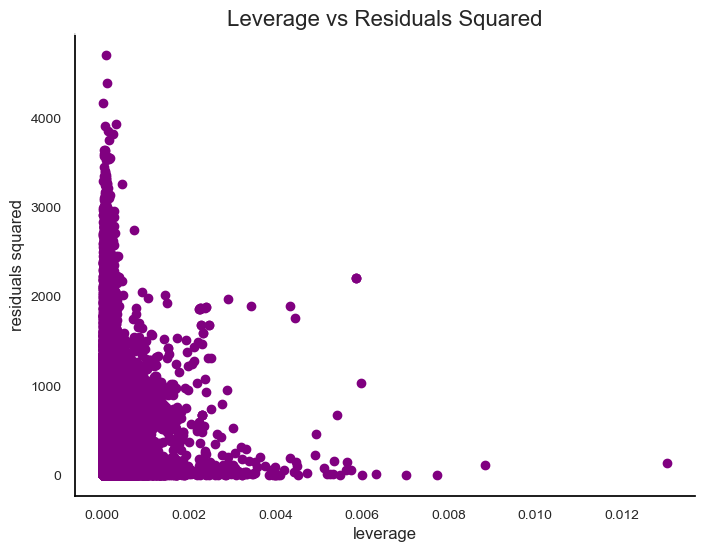

In [27]:
#Going to plot the leverage vs the residuals to determine if there are any outliers
# plot the leverage vs. the square of the residual

i = thirdModel.get_influence()
#Get the diagonal elements which is the leverage
leverage = i.hat_matrix_diag

#Then get residuals
residuals = thirdModel.resid

#Then take the square of the residuals
residualsSquared = residuals**2

#Create a plot
plt.figure(figsize=(8,6))
plt.scatter(leverage, residualsSquared, color='purple')
plt.xlabel('leverage', fontsize=12)
plt.ylabel('residuals squared', fontsize=12)
plt.title('Leverage vs Residuals Squared', fontsize=16)
plt.grid(False)
ax=plt.gca()
ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

From the multiple models it becomes clear that data is not well fit by linear or multilinear models. The R-squared values remain low for all models regardless if it is linear or multilinear. Thus, indicating there is no linear or multilinear relationship prevalent in the data.

Furthermore, from leverage vs residual plot it is clear that the data is not fit well by a multilinear model

## Random Forest for Determining Best Song Predictor for Song Popularity

Since, linear regression model did not perform well and neither did Multilinear Regression model. I am utilizing a Random Forest to determine best predictor for song popularity.

In [80]:
RF_X = Reg_DF.drop('popularity', axis=1)
RF_y = Reg_DF['popularity']

XtrainRF, XtestRF, ytrainRF, ytestRF = train_test_split(RF_X,RF_y, test_size = 0.20, random_state=42)


In [81]:
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest.fit(XtrainRF, ytrainRF)

yPred = randomForest.predict(XtestRF)

In [82]:
meanAbsErr = mean_absolute_error(ytestRF, yPred)
meanSqErr = mean_squared_error(ytestRF, yPred)
RMSE = np.sqrt(meanSqErr)
rSq = r2_score(ytestRF, yPred)

print(f"Mean Absolute Error: {meanAbsErr}")
print(f"Mean Squared Error: {meanSqErr}")
print(f"Root Mean Square Error: {RMSE}")
print(f"R-Squared: {rSq}")

Mean Absolute Error: 10.241333936066605
Mean Squared Error: 226.05731325818405
Root Mean Square Error: 15.035202468147347
R-Squared: 0.4587925228555365


In [83]:
featureImportanceMatrix = randomForest.feature_importances_

features = pd.DataFrame({'Feature': XtrainRF.columns, 'Importance': featureImportanceMatrix})
features = features.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [84]:
features

Feature  Importance
0              genre    0.288580
1       acousticness    0.085428
2        duration_ms    0.077211
3       danceability    0.070251
4           loudness    0.068859
5            valence    0.068130
6              tempo    0.062588
7        speechiness    0.062540
8             energy    0.061444
9   instrumentalness    0.059101
10          liveness    0.057601
11               key    0.027347
12              mode    0.006565
13    time_signature    0.004356

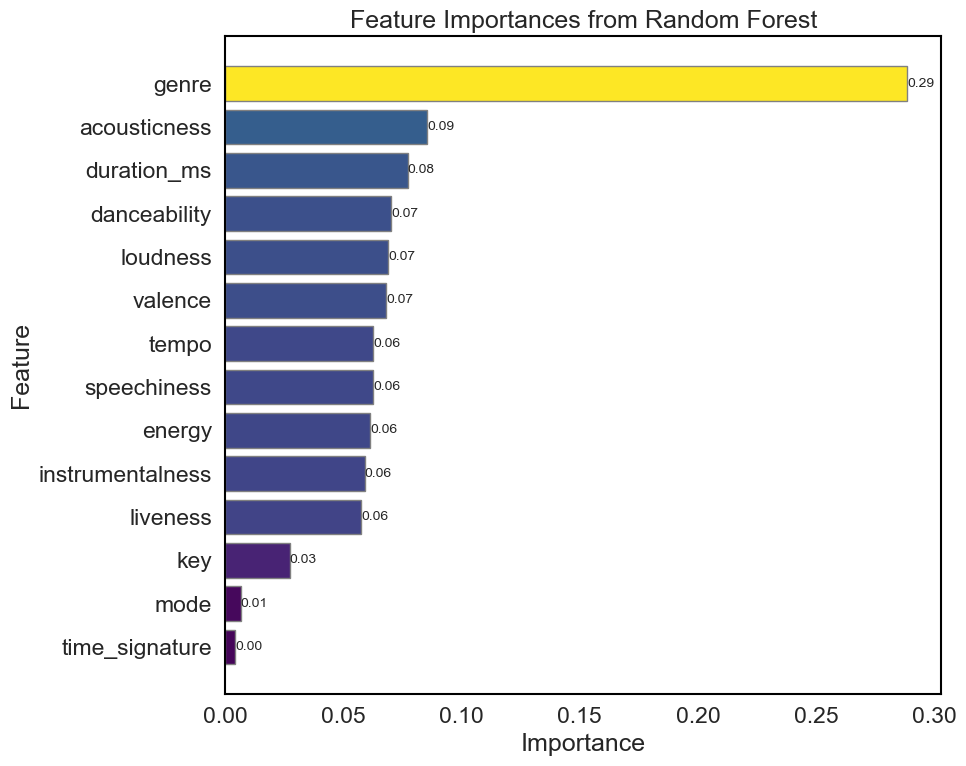

In [85]:
plt.figure(figsize=(10, 8))
bars = plt.barh(features['Feature'], features['Importance'], color=plt.cm.viridis(features['Importance']/max(features['Importance'])), edgecolor='grey')
#plt.barh(features['Feature'], features['Importance'])
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=10)
plt.axis('tight')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['right'].set_linewidth(1.5)
plt.tight_layout()
plt.show()

## Decision Trees and KNN for Genre vs Song Popularity

Next, I am going to run a decision tree and KNN to determine if a decision tree model and KNN model can predict if a song is popular or not based on genre. Since, song popularity is rated from 0 to 100 I will classify a song is popular at a level of 50

### Precision and Recall Functions for KNN and Decision Trees

In [34]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    
    truePos=0
    falsePos=0
    
    for i in range(len(y_pred)):
        if y_true[i]==pos_label_value and y_pred[i]==pos_label_value:
            truePos +=1
            
        if y_pred[i]==pos_label_value and y_true[i] != pos_label_value:
            falsePos += 1
            
    return truePos/(truePos+falsePos)

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    
    truePos=0
    falseNeg=0
    
    
    for i in range(len(y_pred)):
        if y_true[i]==pos_label_value and y_pred[i]==pos_label_value:
            truePos +=1
            
        if y_pred[i] != pos_label_value and y_true[i] == pos_label_value:
            falseNeg += 1
        
    
    return truePos/(truePos+falseNeg)

### Decision Tree

In [35]:
KNN_DT_DF

popular  genre
0             1      0
1             1      0
2             1      0
3             1      0
4             1      0
...         ...    ...
113995        0    112
113996        0    112
113997        0    112
113998        0    112
113999        0    112

[89741 rows x 2 columns]

In [36]:
X_DT_KNN = KNN_DT_DF.drop('popular', axis=1)
y_DT_KNN = KNN_DT_DF['popular']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_DT_KNN,y_DT_KNN, test_size = 0.20, random_state=42)

In [37]:
def build_dt(data_X, data_y, max_depth = None, max_leaf_nodes =None):
    
    decisionTree = DecisionTreeClassifier(random_state=42, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
    decisionTree.fit(data_X, data_y)
    return decisionTree

Model Precision : 0.622
Model Recall : 0.405
Model Accuracy : 0.806


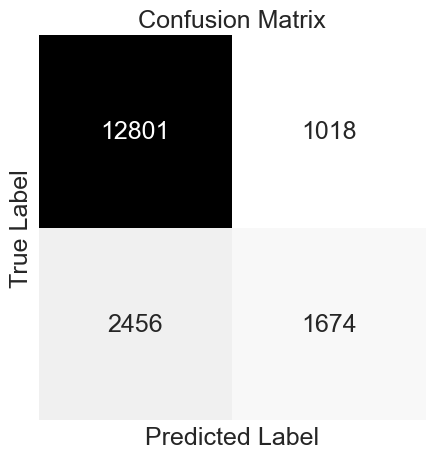

In [38]:
DecisionTree = build_dt(Xtrain, ytrain)
yPred = DecisionTree.predict(Xtest)
yTrue = ytest.tolist()

precision = calculate_precision(yTrue, yPred,1.0)
recall = calculate_recall(yTrue, yPred, 1.0)
accuracy = accuracy_score(yTrue,yPred)

print('Model Precision : %0.3f' % precision)
print('Model Recall : %0.3f' % recall)
print('Model Accuracy : %0.3f' % accuracy)
confusionMatrix = confusion_matrix(yTrue, yPred)

plt.figure(figsize=(5,5))

sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([])
plt.yticks([])
plt.show()



#### GridSearch CV for Decision Tree

In [39]:
#GridSearch for Decision Tree

grid = {
    'max_depth': [3, 5, 10, None],
    'max_leaf_nodes': [5, 10, 20, 30, None]
}

gridSearchDT = GridSearchCV(DecisionTree, grid, cv=5, scoring='accuracy')

gridSearchDT.fit(Xtrain, ytrain)

print('Best Parameters', gridSearchDT.best_params_)

Best Parameters {'max_depth': None, 'max_leaf_nodes': None}


### KNN

In [40]:
def build_KNN(data_X, data_y, neighbors):
    
    KNN = KNeighborsClassifier(n_neighbors=neighbors)
        
    KNN.fit(data_X, data_y)
    return KNN
    

In [41]:
acc = []
allks = [1,5,10,25,75,100,150,200,250,300,350,400,450,500,1000]
yTrue = ytest.tolist()

# your code here

from sklearn.metrics import accuracy_score

for ks in allks:
    knn = build_KNN(Xtrain, ytrain, ks)
    yhat = knn.predict(Xtest)
    accuracy = accuracy_score(yTrue,yhat)
    acc.append(accuracy)
    #print(accuracy)


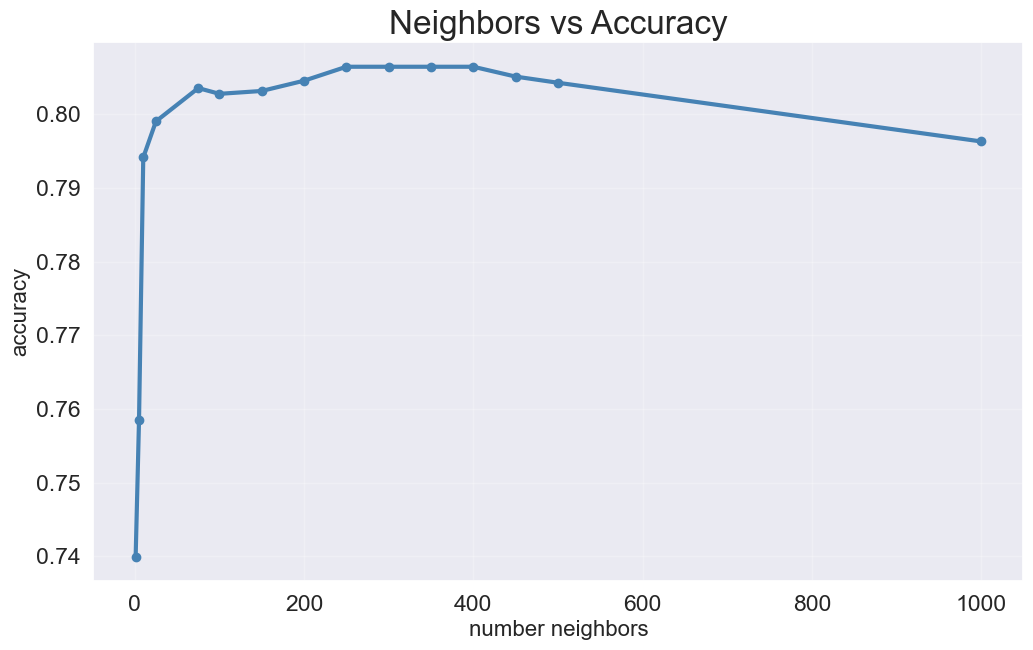

In [42]:
# you can use this code to create your plot    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc, marker="o", color="steelblue", lw=3, label="unweighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.title('Neighbors vs Accuracy', fontsize=24)
ax.grid(alpha=0.25)
plt.show()

Model Precision : 0.622
Model Recall : 0.405
Model Accuracy : 0.806


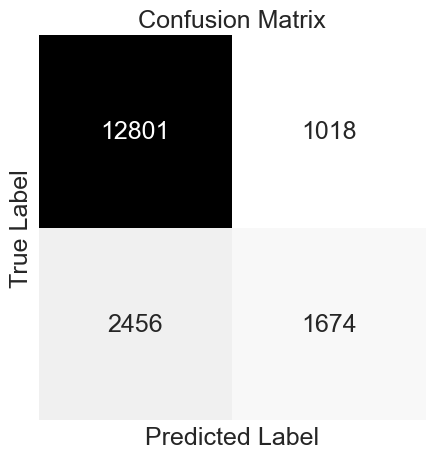

In [43]:
KNN = build_KNN(Xtrain, ytrain,250)
yPreds = KNN.predict(Xtest)

precision = calculate_precision(yTrue, yPreds,1.0)
recall = calculate_recall(yTrue, yPreds, 1.0)
accuracy = accuracy_score(yTrue,yPreds)

print('Model Precision : %0.3f' % precision)
print('Model Recall : %0.3f' % recall)
print('Model Accuracy : %0.3f' % accuracy)
confusionMatrix = confusion_matrix(yTrue, yPreds)

plt.figure(figsize=(5,5))

sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([])
plt.yticks([])
plt.show()